### Shraddha assignment Model 1

### Business Objective

This data is about Hand Writtern Pixel Detection. This data has total 26 letters . Except lettr all the field are numaric . 
 values classified into any possible 26 alphabetical letters, a Support Vector Machine (SVM) analysis will be performed to allow to learn various characteristics of 26 alphabets and make prediction on the letter classfication on data. There are Model 1 , Model 2 and Model 3.

### Data

1. lettr = capital letter (26 values from A to Z)
2. x-box = horizontal position of box (integer)
3. y-box = vertical position of box (integer)
4. width = width of box (integer)
5. high = height of box (integer)
6. onpix = total # on pixels (integer)
7. x-bar = mean x of on pixels in box (integer)
8. y-bar = mean y of on pixels in box (integer)
9. x2bar = mean x variance (integer)
10. y2bar = mean y variance (integer)
11. xybar = mean x y correlation (integer)
12. x2ybr = mean of x * x * y (integer)
13. xy2br = mean of x * y * y (integer)
14. x-ege = mean edge count left to right (integer)
15. xegvy = correlation of x-ege with y (integer)
16. y-ege = mean edge count bottom to top (integer)
17. yegvx = correlation of y-ege with x (integer)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets # Iris dataset to be imported from the datasets package
from sklearn.model_selection import train_test_split # Perform train-test split to train and test the model 
from sklearn.preprocessing import StandardScaler # Used for Scaling
from sklearn.neighbors import KNeighborsClassifier # KKN algorithm to be imported to build classification model
from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
df=pd.read_csv("letters.csv")

In [3]:
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df.tail()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
df.shape

(20000, 17)

In [7]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


Data contains 20000 observations and 17 featuers . Accept lettr all the other features are numarical .

## Data cleanup

In [8]:
df.isnull().sum()

lettr     0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
dtype: int64

In [9]:
df.duplicated().sum()

1332

In [10]:
df.drop_duplicates(inplace=True) #we can drop the duplicate values because it is less then 40%

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.shape

(18668, 17)

In [13]:
data = list(np.sort(df['lettr'].unique()))
print(data)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lettr,18668,26,P,782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x-box,18668.0,NaN,NaN,NaN,4.150793,1.879428,0.0,3.0,4.0,5.0,15.0
y-box,18668.0,NaN,NaN,NaN,7.244322,3.18766,0.0,5.0,8.0,10.0,15.0
width,18668.0,NaN,NaN,NaN,5.279891,1.93496,0.0,4.0,5.0,6.0,15.0
high,18668.0,NaN,NaN,NaN,5.50691,2.178292,0.0,4.0,6.0,7.0,15.0
onpix,18668.0,NaN,NaN,NaN,3.660596,2.160555,0.0,2.0,3.0,5.0,15.0
x-bar,18668.0,NaN,NaN,NaN,6.919381,2.032226,0.0,6.0,7.0,8.0,15.0
y-bar,18668.0,NaN,NaN,NaN,7.529409,2.319834,0.0,6.0,7.0,9.0,15.0
x2bar,18668.0,NaN,NaN,NaN,4.584637,2.625714,0.0,3.0,4.0,6.0,15.0
y2bar,18668.0,NaN,NaN,NaN,5.201361,2.320102,0.0,4.0,5.0,7.0,15.0


After data cleanup there 18668 observations and 17 features.

## EDA

## Univariate 

<AxesSubplot:xlabel='x-box'>

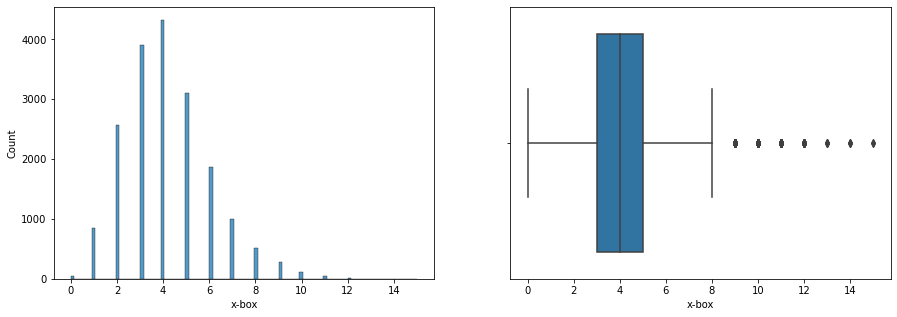

In [15]:
fig_dims = (15, 5)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(x = 'x-box', data=df, ax=axs[0])
sns.boxplot(x = 'x-box', data=df, ax=axs[1])

<AxesSubplot:xlabel='y-box'>

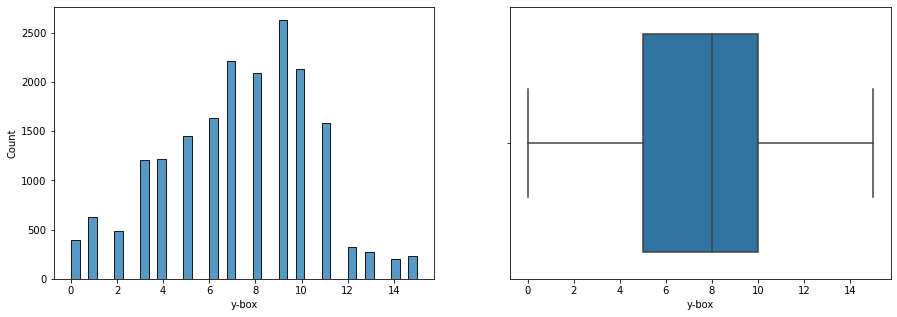

In [16]:
fig_dims = (15,5)
fig , axs =plt.subplots(nrows=1,ncols=2,figsize=fig_dims)
sns.histplot(x="y-box",data=df,ax=axs[0])
sns.boxplot(x="y-box",data=df,ax=axs[1])

<AxesSubplot:xlabel='lettr', ylabel='count'>

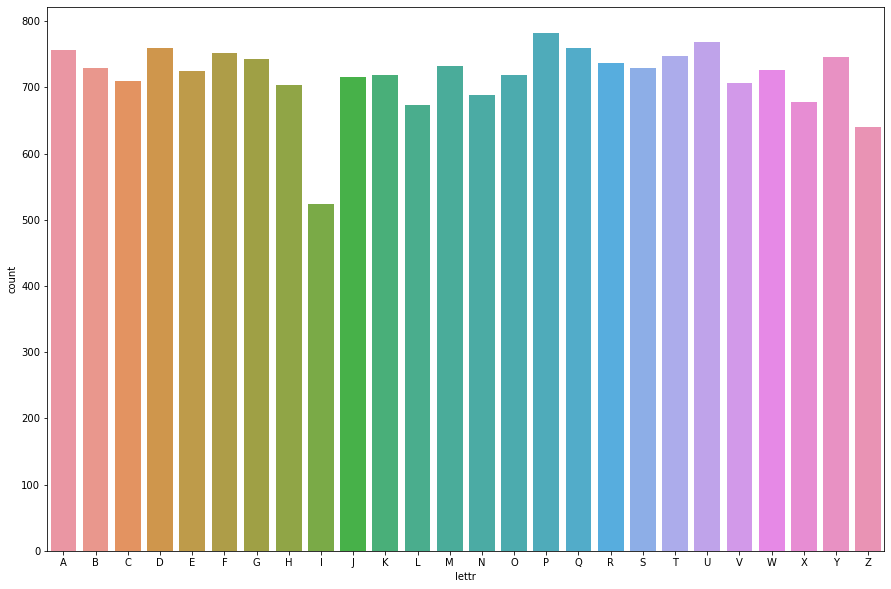

In [17]:
fig_dims = (15,10)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=fig_dims)
sns.countplot(x="lettr",data=df,order=data)

In [18]:
df.lettr.value_counts()

P    782
U    768
D    760
Q    760
A    756
F    752
T    748
Y    746
G    743
R    737
M    732
B    730
S    729
W    726
E    725
O    718
K    718
J    715
C    710
V    706
H    704
N    688
X    678
L    673
Z    640
I    524
Name: lettr, dtype: int64

## Bivariate

<AxesSubplot:xlabel='width', ylabel='high'>

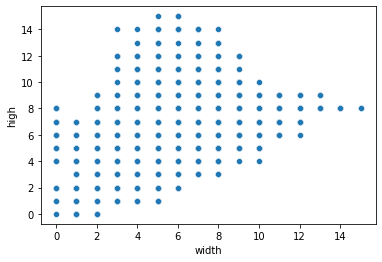

In [19]:
sns.scatterplot(x="width",y="high",data=df)

<AxesSubplot:xlabel='lettr', ylabel='x-box'>

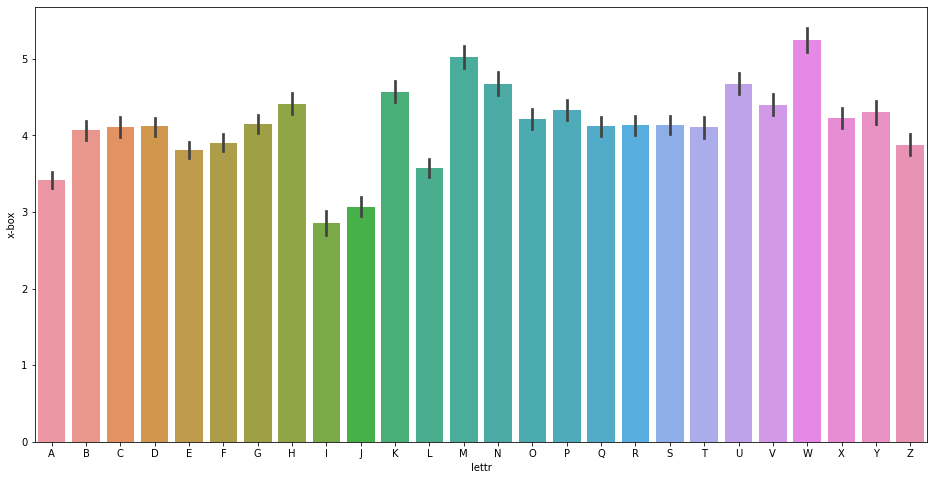

In [20]:
plt.figure(figsize=(16, 8))
sns.barplot(x='lettr', y='x-box',data=df,order=data)

In [21]:
df_num=df.select_dtypes(exclude="object")
num_list=df_num.columns
num_list

Index(['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'x-ege', 'xegvy', 'y-ege',
       'yegvx'],
      dtype='object')

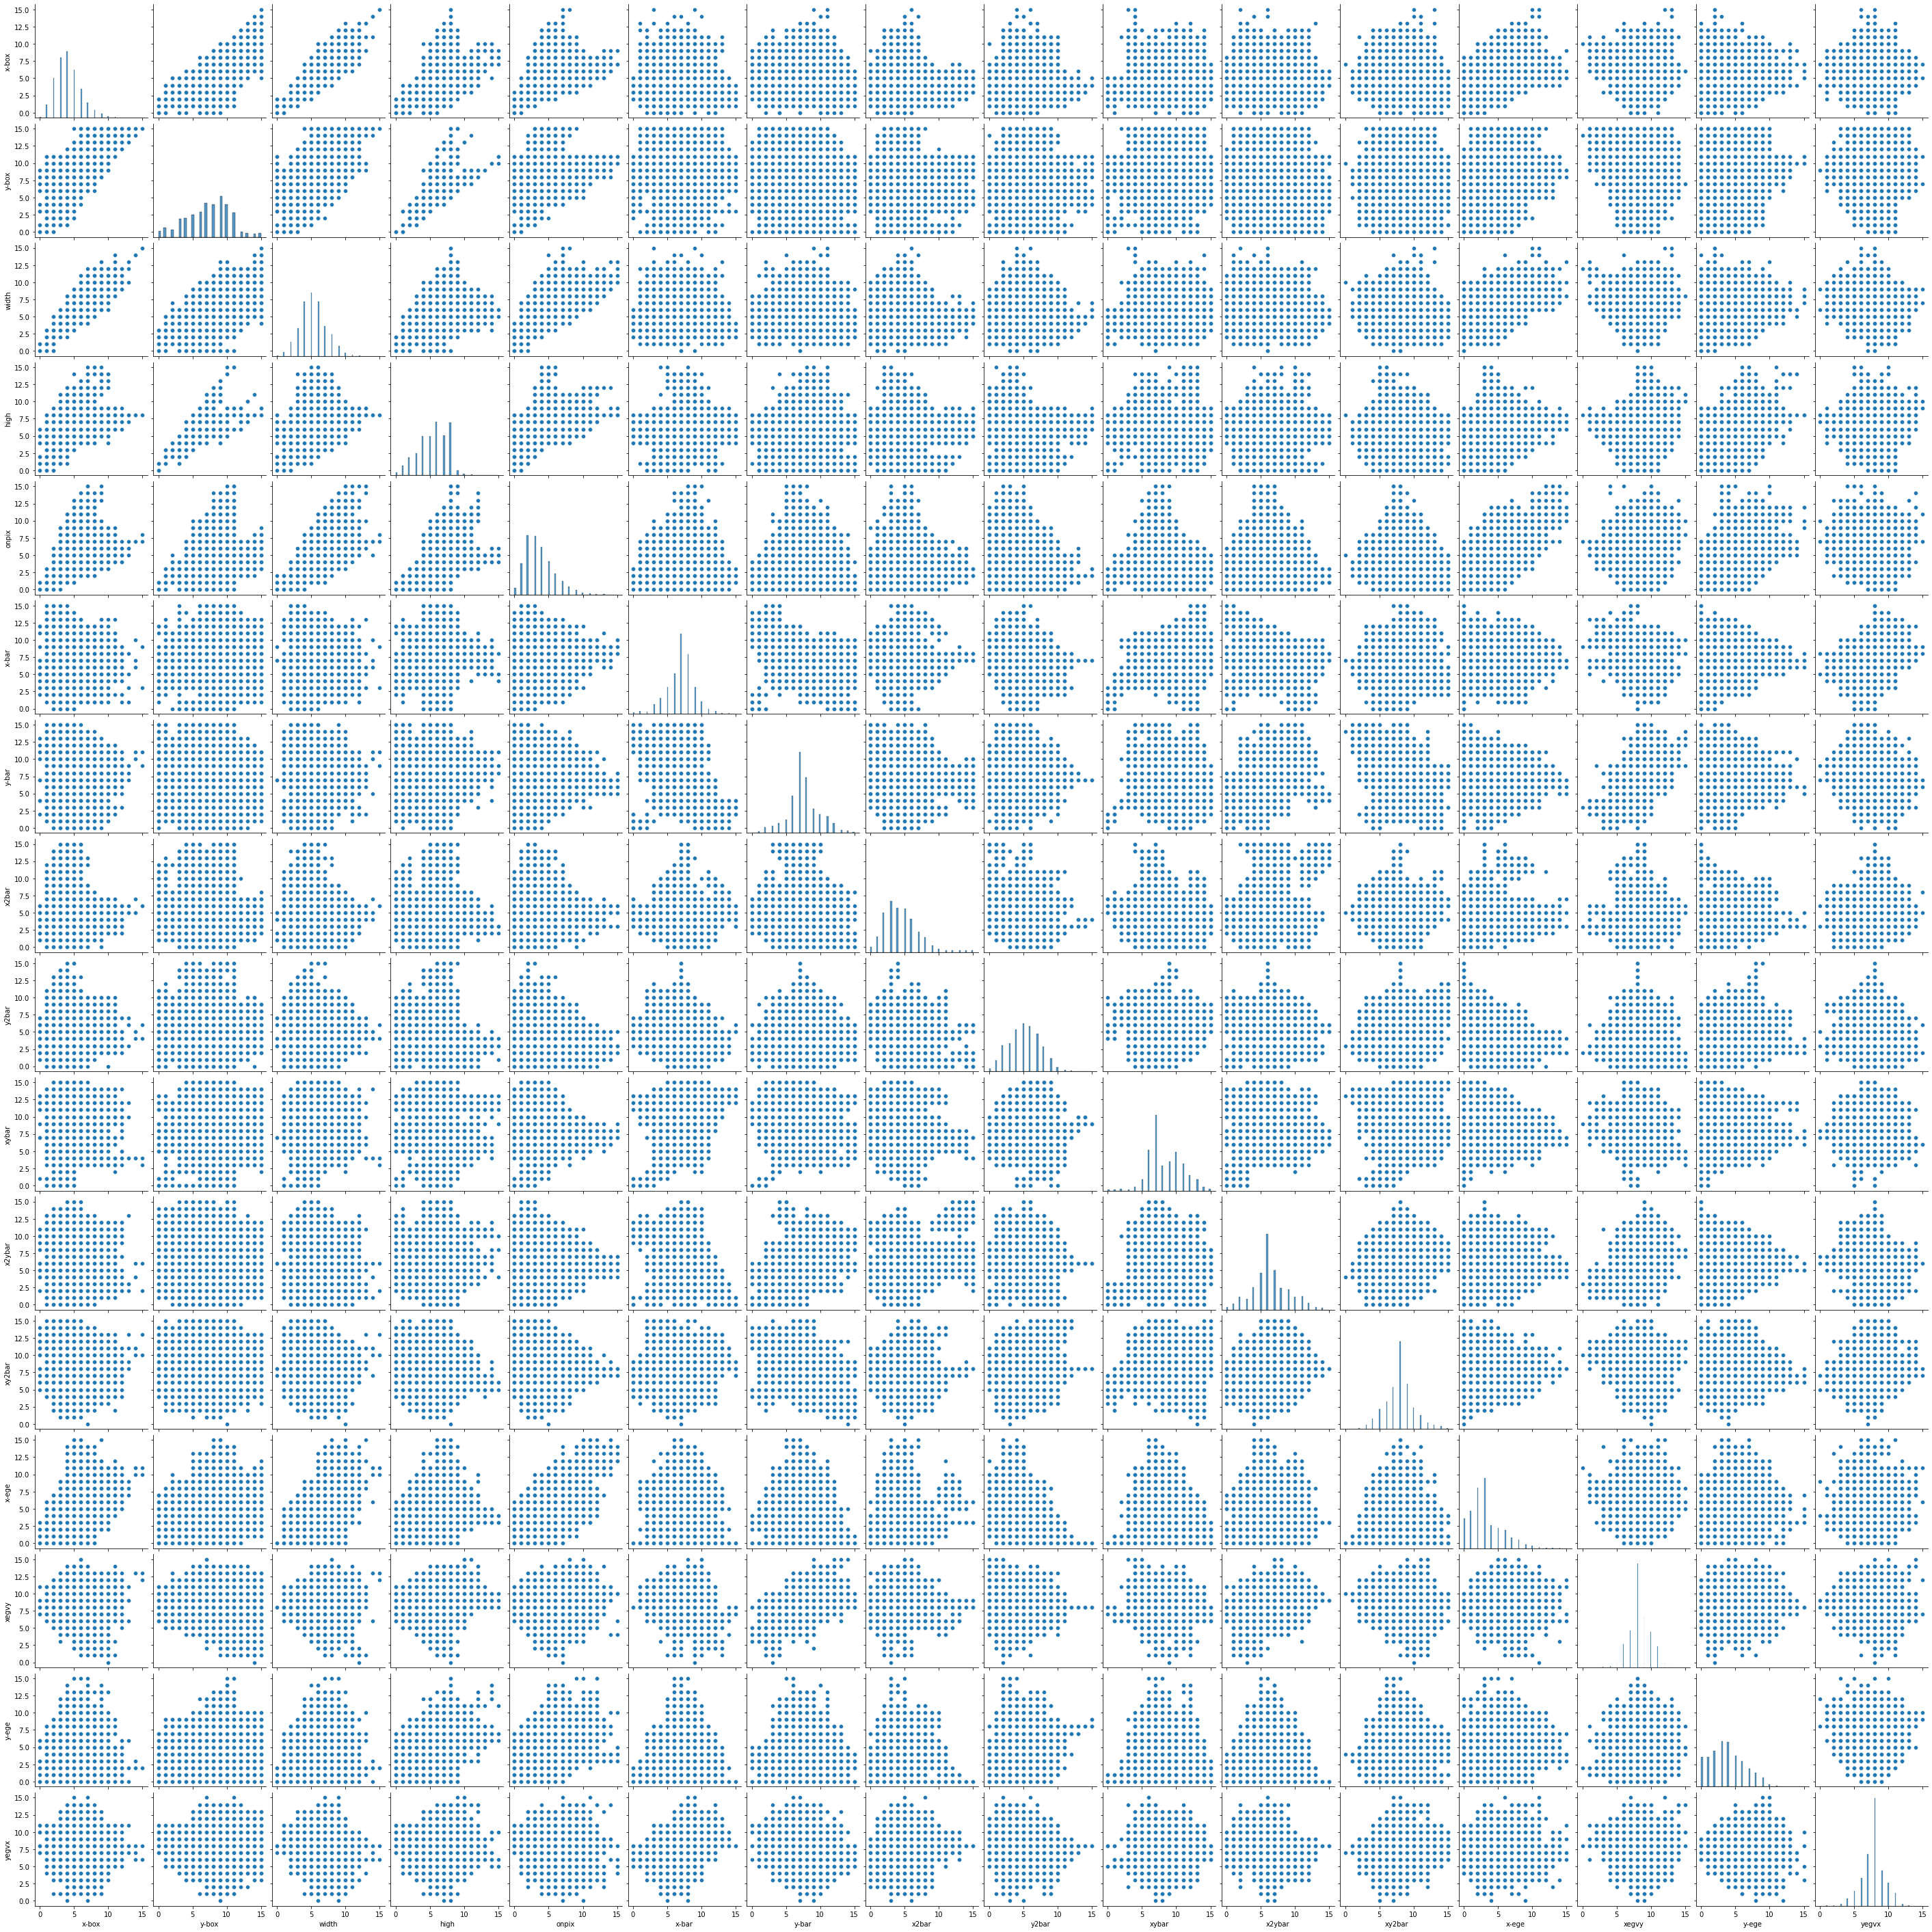

In [22]:
sns.pairplot(vars=num_list,data=df)

In [23]:
corr = df[num_list].corr()
corr

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
x-box,1.000000,0.753845,0.838201,0.656202,0.586514,-0.039371,0.035260,0.010554,0.035618,0.135848,0.033564,-0.045004,0.473408,0.094814,0.246954,-0.097928
y-box,0.753845,1.000000,0.660359,0.804746,0.529108,0.044918,-0.055264,-0.017451,0.077625,0.150073,-0.058348,-0.004483,0.262301,-0.007424,0.214834,-0.031288
width,0.838201,0.660359,1.000000,0.647059,0.747093,0.057657,0.007720,-0.108948,0.036848,0.088383,0.004005,-0.044465,0.548471,0.037140,0.225726,-0.111611
high,0.656202,0.804746,0.647059,1.000000,0.631189,0.043576,-0.028748,0.094866,0.030820,-0.005738,-0.009940,0.030940,0.250480,0.023574,0.289518,-0.006940
onpix,0.586514,0.529108,0.747093,0.631189,1.000000,0.138054,-0.046437,-0.006882,-0.095682,-0.111016,-0.079454,-0.037892,0.627043,0.011670,0.483866,-0.053799
x-bar,-0.039371,0.044918,0.057657,0.043576,0.138054,1.000000,-0.394904,-0.053963,-0.127433,0.056401,-0.379856,-0.043720,0.139327,-0.259587,0.126966,0.258355
y-bar,0.035260,-0.055264,0.007720,-0.028748,-0.046437,-0.394904,1.000000,-0.111068,-0.049806,0.155055,0.596464,-0.284431,-0.049289,0.561759,-0.096509,-0.211369
x2bar,0.010554,-0.017451,-0.108948,0.094866,-0.006882,-0.053963,-0.111068,1.000000,-0.163920,-0.309157,0.041791,0.087403,0.113528,-0.078674,0.033467,0.185946
y2bar,0.035618,0.077625,0.036848,0.030820,-0.095682,-0.127433,-0.049806,-0.163920,1.000000,0.123406,-0.049807,0.118624,-0.386254,-0.058009,0.240212,-0.061613
xybar,0.135848,0.150073,0.088383,-0.005738,-0.111016,0.056401,0.155055,-0.309157,0.123406,1.000000,0.042297,-0.119797,-0.197548,0.024034,-0.124774,-0.108670


<AxesSubplot:>

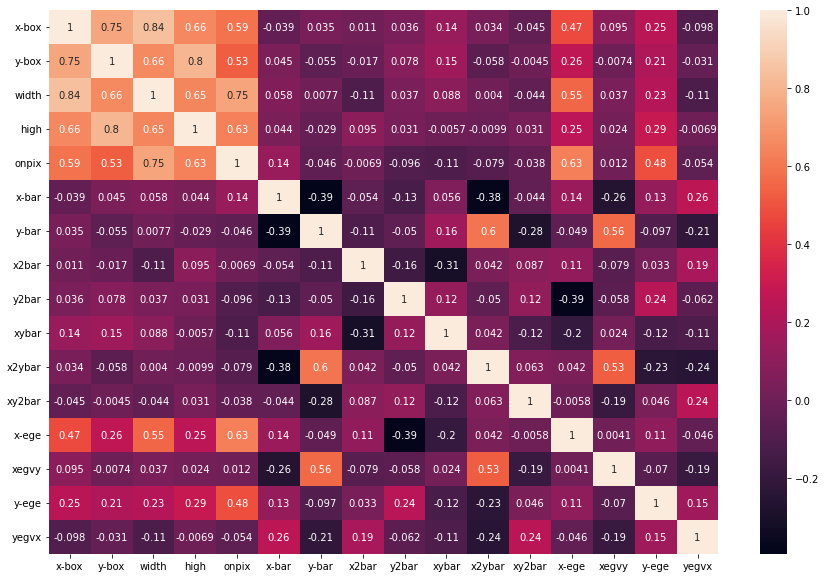

In [24]:
fig_dims = (15,10)
fig, axs = plt.subplots(nrows=1, figsize=fig_dims)
sns.heatmap(corr, annot=True)

## Multivariate

<AxesSubplot:xlabel='x2bar', ylabel='y2bar'>

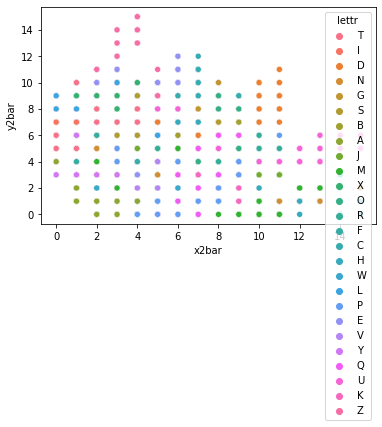

In [25]:
sns.scatterplot(x="x2bar",y="y2bar",hue="lettr",data=df)

## Outlier treatment

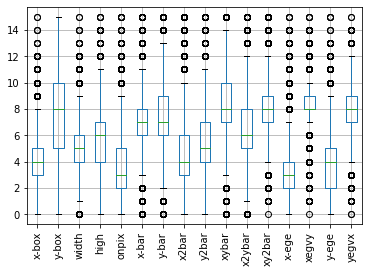

In [26]:
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [27]:
def treat_outliers(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    IQR=q3-q1
    lower_bound=q1-(1.5*IQR)
    upper_bound=q3+(1.5*IQR)
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [28]:
for i in num_list:
    df[i]=treat_outliers(df[i])

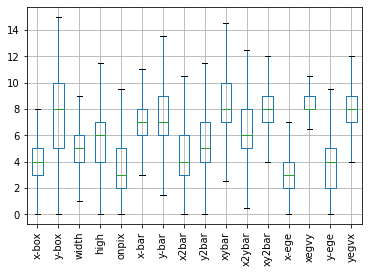

In [29]:
df[num_list].boxplot()
plt.xticks(rotation=90)
plt.show()

#### Spliting of data

In [30]:
x = df.drop("lettr",axis=1)
y = df.lettr

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=123)

In [32]:
x_train.shape

(13067, 16)

In [33]:
x_test.shape

(5601, 16)

In [34]:
sclr = StandardScaler()

In [35]:
x_train = sclr.fit_transform(x_train)

In [36]:
x_test = sclr.transform(x_test) #to keep it as unseen data

## KNN

In [37]:
KNN_Model = KNeighborsClassifier()

In [38]:
KNN_Model.fit(x_train,y_train)

KNeighborsClassifier()

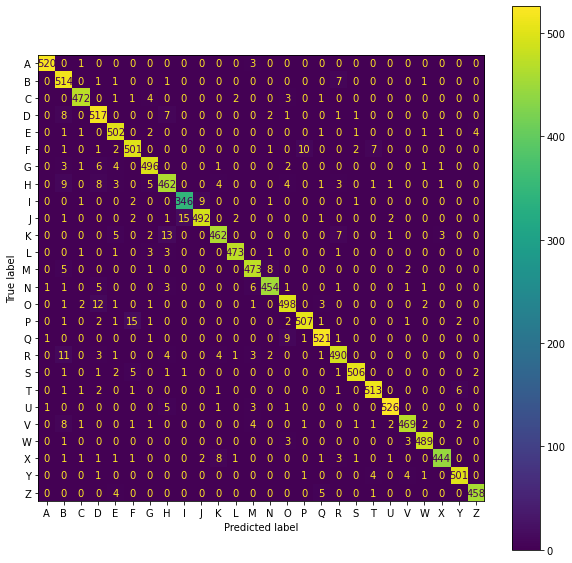

In [39]:
fig, ax = plt.subplots( figsize=(10, 10))
y_train_pred = KNN_Model.predict(x_train)
plot_confusion_matrix(KNN_Model,x_train,y_train,ax = ax)

In [40]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       524
           B       0.90      0.98      0.94       525
           C       0.98      0.98      0.98       484
           D       0.92      0.96      0.94       537
           E       0.95      0.98      0.96       514
           F       0.95      0.95      0.95       525
           G       0.96      0.96      0.96       515
           H       0.92      0.92      0.92       502
           I       0.96      0.96      0.96       360
           J       0.98      0.95      0.97       516
           K       0.96      0.94      0.95       493
           L       0.99      0.98      0.98       483
           M       0.96      0.97      0.96       489
           N       0.97      0.96      0.96       474
           O       0.95      0.96      0.95       521
           P       0.97      0.95      0.96       533
           Q       0.97      0.98      0.97       534
           R       0.95    

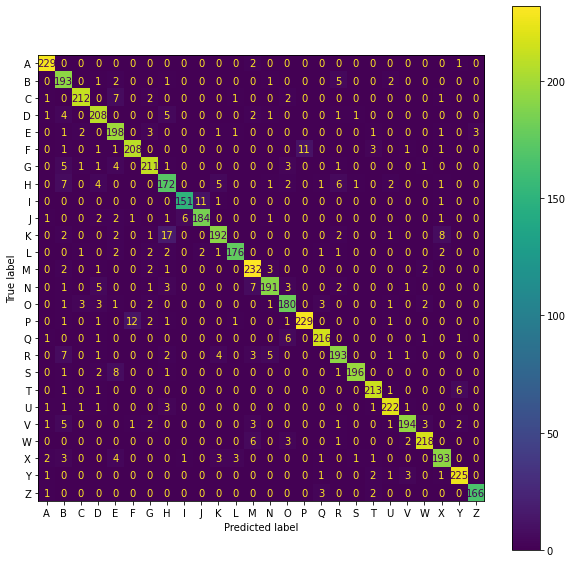

In [41]:
fig, ax = plt.subplots( figsize=(10, 10))
y_test_pred = KNN_Model.predict(x_test)
plot_confusion_matrix(KNN_Model,x_test,y_test, ax = ax)

In [42]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           A       0.96      0.99      0.97       232
           B       0.82      0.94      0.88       205
           C       0.96      0.94      0.95       226
           D       0.89      0.93      0.91       223
           E       0.86      0.94      0.90       211
           F       0.94      0.92      0.93       227
           G       0.93      0.93      0.93       228
           H       0.82      0.85      0.83       202
           I       0.96      0.92      0.94       164
           J       0.93      0.92      0.93       199
           K       0.93      0.85      0.89       225
           L       0.97      0.93      0.95       190
           M       0.91      0.95      0.93       243
           N       0.94      0.89      0.91       214
           O       0.90      0.91      0.91       197
           P       0.95      0.92      0.94       249
           Q       0.96      0.96      0.96       226
           R       0.90    

In [43]:
KNN_Model = KNeighborsClassifier(n_neighbors=11)
KNN_Model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

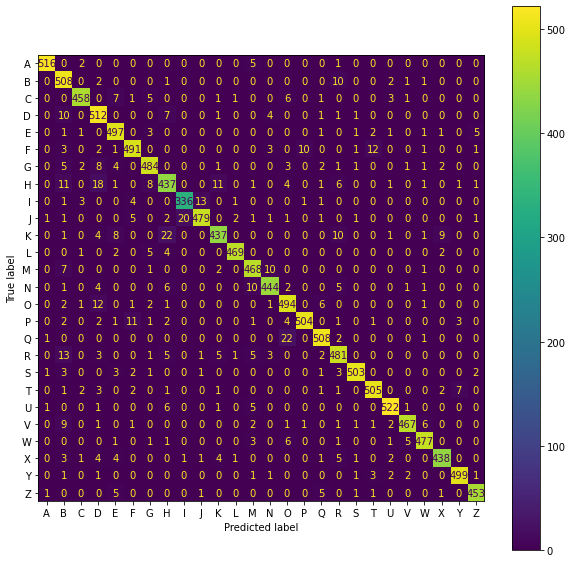

In [44]:
fig, ax = plt.subplots( figsize=(10, 10))
y_train_pred = KNN_Model.predict(x_train)
plot_confusion_matrix(KNN_Model,x_train,y_train, ax = ax)

In [45]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           A       0.99      0.98      0.99       524
           B       0.87      0.97      0.92       525
           C       0.97      0.95      0.96       484
           D       0.89      0.95      0.92       537
           E       0.93      0.97      0.95       514
           F       0.95      0.94      0.94       525
           G       0.95      0.94      0.94       515
           H       0.88      0.87      0.88       502
           I       0.94      0.93      0.94       360
           J       0.97      0.93      0.95       516
           K       0.94      0.89      0.91       493
           L       0.99      0.97      0.98       483
           M       0.93      0.96      0.94       489
           N       0.95      0.94      0.94       474
           O       0.91      0.95      0.93       521
           P       0.98      0.95      0.96       533
           Q       0.95      0.95      0.95       534
           R       0.91    

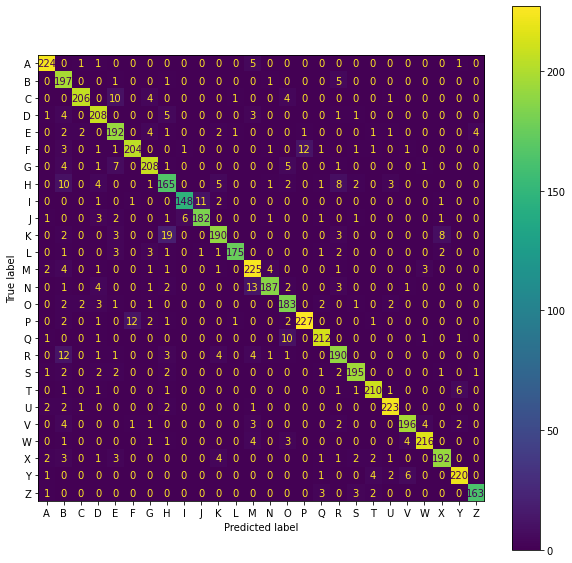

In [46]:
fig, ax = plt.subplots( figsize=(10, 10))
y_test_pred = KNN_Model.predict(x_test)
plot_confusion_matrix(KNN_Model,x_test,y_test, ax = ax)

In [47]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           A       0.95      0.97      0.96       232
           B       0.77      0.96      0.85       205
           C       0.97      0.91      0.94       226
           D       0.89      0.93      0.91       223
           E       0.85      0.91      0.88       211
           F       0.94      0.90      0.92       227
           G       0.92      0.91      0.91       228
           H       0.80      0.82      0.81       202
           I       0.95      0.90      0.93       164
           J       0.94      0.91      0.93       199
           K       0.91      0.84      0.88       225
           L       0.98      0.92      0.95       190
           M       0.87      0.93      0.90       243
           N       0.95      0.87      0.91       214
           O       0.86      0.93      0.89       197
           P       0.95      0.91      0.93       249
           Q       0.95      0.94      0.94       226
           R       0.86    

In [48]:
ac_scores=[]

for k in range (3,20,1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores = knn.score(x_test,y_test)
    ac_scores.append(scores)
    
MCE = [1 - x for x in ac_scores]
MCE

[0.06855918585966791,
 0.0719514372433494,
 0.07123727905731114,
 0.07230851633636848,
 0.07462953044099263,
 0.07766470273165504,
 0.0815925727548652,
 0.0799857168362792,
 0.08266381003392254,
 0.08230673094090346,
 0.08659168005713269,
 0.08677021960364217,
 0.08998393144081418,
 0.09087662917336192,
 0.08980539189430459,
 0.09301910373147648,
 0.09337618282449567]

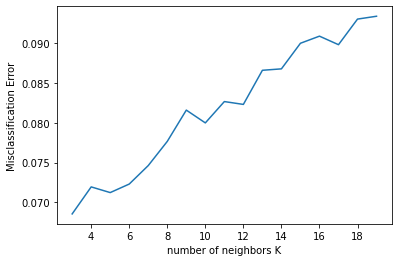

In [49]:
plt.plot(range(3,20,1),MCE)
plt.xlabel("number of neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [50]:
KNN_Model = KNeighborsClassifier(n_neighbors=3) # checking if there is no overfit model
KNN_Model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

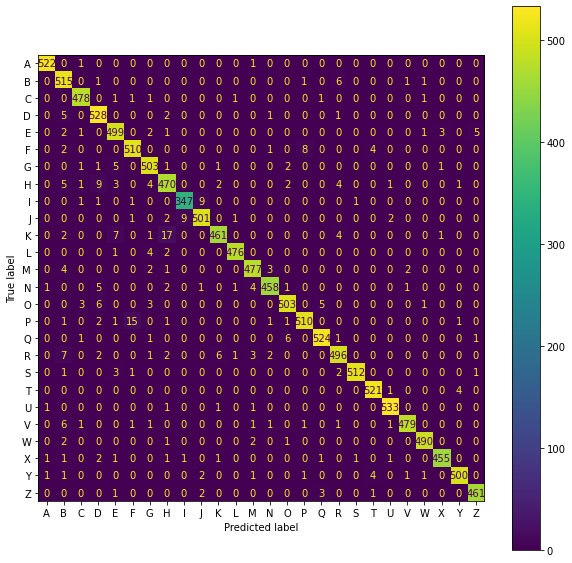

In [51]:
fig, ax = plt.subplots( figsize=(10, 10))
y_train_pred = KNN_Model.predict(x_train)
plot_confusion_matrix(KNN_Model,x_train,y_train, ax=ax)

In [52]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           A       0.99      1.00      0.99       524
           B       0.93      0.98      0.95       525
           C       0.98      0.99      0.98       484
           D       0.95      0.98      0.97       537
           E       0.96      0.97      0.96       514
           F       0.96      0.97      0.97       525
           G       0.96      0.98      0.97       515
           H       0.93      0.94      0.93       502
           I       0.97      0.96      0.97       360
           J       0.97      0.97      0.97       516
           K       0.98      0.94      0.96       493
           L       0.99      0.99      0.99       483
           M       0.97      0.98      0.97       489
           N       0.98      0.97      0.97       474
           O       0.97      0.97      0.97       521
           P       0.98      0.96      0.97       533
           Q       0.98      0.98      0.98       534
           R       0.96    

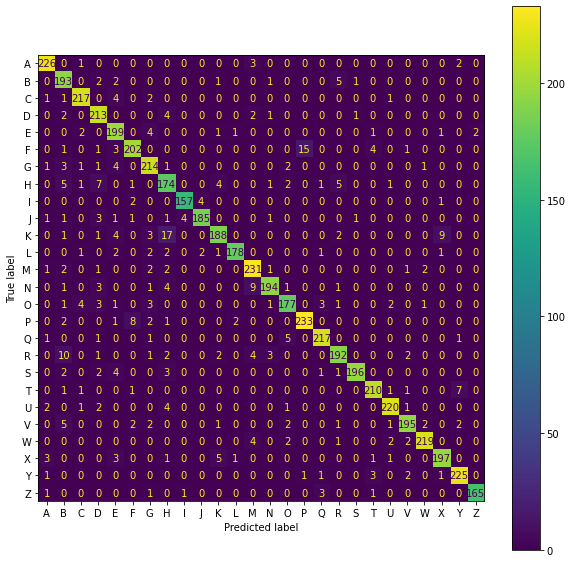

In [53]:
fig, ax = plt.subplots( figsize=(10, 10))
y_test_pred = KNN_Model.predict(x_test)
plot_confusion_matrix(KNN_Model,x_test,y_test, ax=ax)

In [54]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           A       0.95      0.97      0.96       232
           B       0.84      0.94      0.89       205
           C       0.95      0.96      0.95       226
           D       0.88      0.96      0.92       223
           E       0.87      0.94      0.91       211
           F       0.93      0.89      0.91       227
           G       0.90      0.94      0.92       228
           H       0.81      0.86      0.83       202
           I       0.97      0.96      0.96       164
           J       0.97      0.93      0.95       199
           K       0.93      0.84      0.88       225
           L       0.98      0.94      0.96       190
           M       0.91      0.95      0.93       243
           N       0.96      0.91      0.93       214
           O       0.92      0.90      0.91       197
           P       0.94      0.94      0.94       249
           Q       0.96      0.96      0.96       226
           R       0.92    

# SVM

In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC()

In [57]:
svc.fit(x_train,y_train)

SVC()

In [58]:
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

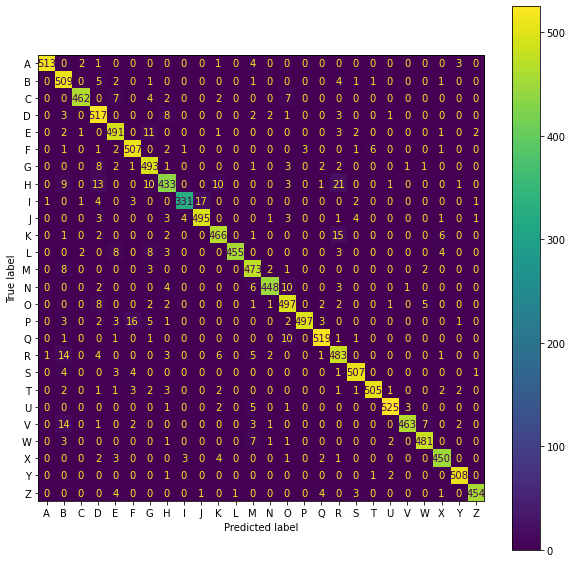

In [59]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc,x_train,y_train, ax=ax)

In [60]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           A       1.00      0.98      0.99       524
           B       0.89      0.97      0.93       525
           C       0.99      0.95      0.97       484
           D       0.90      0.96      0.93       537
           E       0.93      0.96      0.94       514
           F       0.95      0.97      0.96       525
           G       0.91      0.96      0.93       515
           H       0.92      0.86      0.89       502
           I       0.98      0.92      0.95       360
           J       0.96      0.96      0.96       516
           K       0.94      0.95      0.94       493
           L       1.00      0.94      0.97       483
           M       0.93      0.97      0.95       489
           N       0.98      0.95      0.96       474
           O       0.92      0.95      0.94       521
           P       0.99      0.93      0.96       533
           Q       0.97      0.97      0.97       534
           R       0.89    

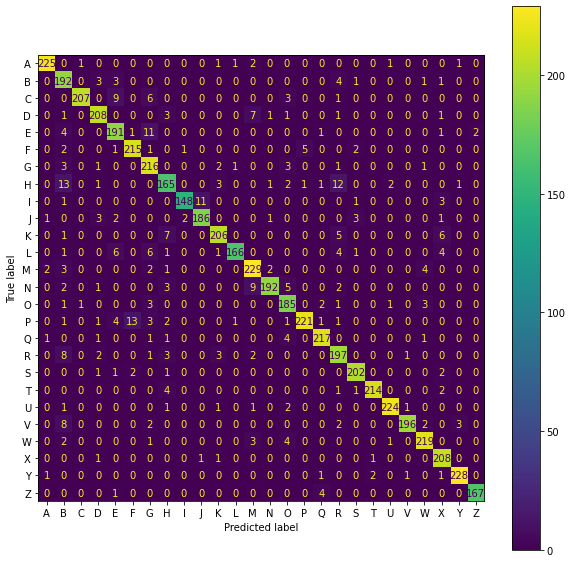

In [61]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc,x_test,y_test,ax=ax)

In [62]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           A       0.98      0.97      0.97       232
           B       0.79      0.94      0.86       205
           C       0.99      0.92      0.95       226
           D       0.93      0.93      0.93       223
           E       0.88      0.91      0.89       211
           F       0.93      0.95      0.94       227
           G       0.85      0.95      0.90       228
           H       0.86      0.82      0.84       202
           I       0.98      0.90      0.94       164
           J       0.94      0.93      0.94       199
           K       0.94      0.92      0.93       225
           L       0.98      0.87      0.92       190
           M       0.91      0.94      0.92       243
           N       0.97      0.90      0.93       214
           O       0.88      0.94      0.91       197
           P       0.97      0.89      0.93       249
           Q       0.96      0.96      0.96       226
           R       0.85    

## Tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {"kernel" :["linear","rbf","poly"],
             "C" : [0.1,1,10,100],
             "gamma" : [0.0001,0.01,0.1,1,10]}

svc1 = SVC(random_state=10)
grid_search = GridSearchCV(estimator=svc1,param_grid=param_grid,cv = 5)

In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=10),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [66]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [67]:
svc1 = grid_search.best_estimator_

In [68]:
y_pred_train = svc1.predict(x_train)
y_pred_test = svc1.predict(x_test)

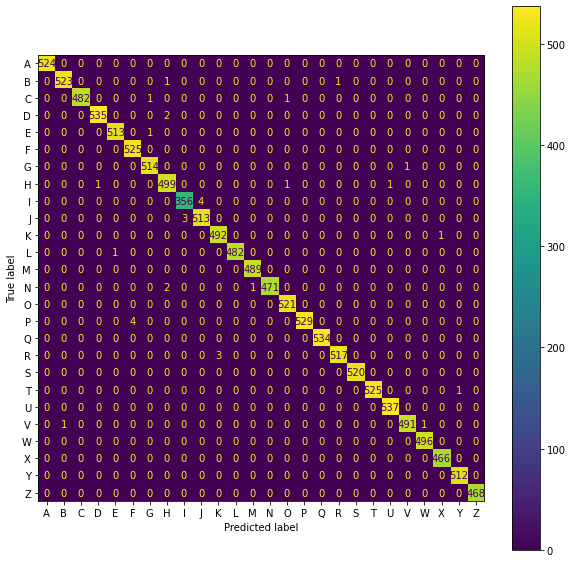

In [69]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc1,x_train,y_train,ax=ax)

In [70]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       524
           B       1.00      1.00      1.00       525
           C       1.00      1.00      1.00       484
           D       1.00      1.00      1.00       537
           E       1.00      1.00      1.00       514
           F       0.99      1.00      1.00       525
           G       1.00      1.00      1.00       515
           H       0.99      0.99      0.99       502
           I       0.99      0.99      0.99       360
           J       0.99      0.99      0.99       516
           K       0.99      1.00      1.00       493
           L       1.00      1.00      1.00       483
           M       1.00      1.00      1.00       489
           N       1.00      0.99      1.00       474
           O       1.00      1.00      1.00       521
           P       1.00      0.99      1.00       533
           Q       1.00      1.00      1.00       534
           R       1.00    

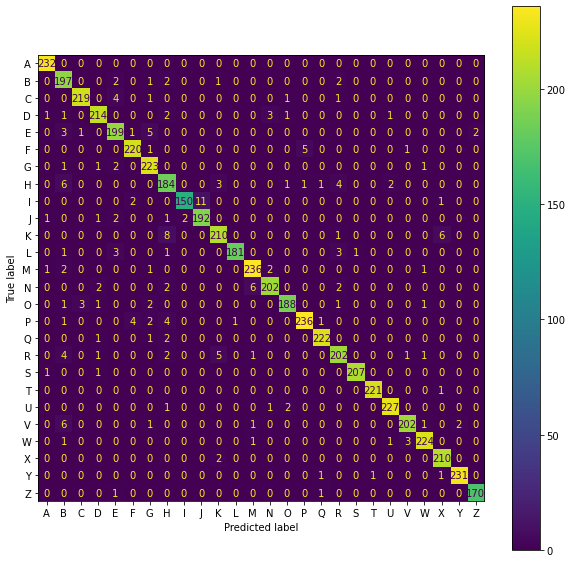

In [71]:
fig, ax = plt.subplots( figsize=(10, 10))
plot_confusion_matrix(svc1,x_test,y_test,ax=ax)

In [72]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       232
           B       0.88      0.96      0.92       205
           C       0.98      0.97      0.98       226
           D       0.96      0.96      0.96       223
           E       0.93      0.94      0.94       211
           F       0.97      0.97      0.97       227
           G       0.94      0.98      0.96       228
           H       0.88      0.91      0.90       202
           I       0.99      0.91      0.95       164
           J       0.95      0.96      0.96       199
           K       0.95      0.93      0.94       225
           L       0.99      0.95      0.97       190
           M       0.96      0.97      0.97       243
           N       0.97      0.94      0.96       214
           O       0.97      0.95      0.96       197
           P       0.98      0.95      0.96       249
           Q       0.98      0.98      0.98       226
           R       0.94    